In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [14]:
data=pd.read_csv('/content/Data.csv')


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [17]:
data.shape

(14731, 22)

In [18]:
data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [19]:
labelencoder=LabelEncoder()
data['Made_Purchase']=labelencoder.fit_transform(data['Made_Purchase'])
data['Month_SeasonalPurchase']=labelencoder.fit_transform(data['Month_SeasonalPurchase'])
data['CustomerType']=labelencoder.fit_transform(data['CustomerType'])
data['Cookies Setting']=labelencoder.fit_transform(data['Cookies Setting'])
data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,2,Not Specified,1,Not Specified,Other,0.0,0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,2,Female,1,Others,Married,0.0,0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,2,Female,0,Others,Married,1.0,0
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,2,Male,0,Diploma,Single,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,2,Male,1,Diploma,Other,1.0,0


In [20]:
data=data.drop(['Education','Gender','Marital Status'],axis=1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14731 non-null  int64  
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [9]:
data.groupby('Made_Purchase').agg(['mean','median'])

HomePage        HomePage_Duration        LandingPage         \
                   mean median              mean median        mean median   
Made_Purchase                                                                
0              2.114540    0.0         73.337327    0.0    0.448345    0.0   
1              2.467607    1.0         88.836944   15.0    0.558608    0.0   

              LandingPage_Duration        ProductDescriptionPage         ...  \
                              mean median                   mean median  ...   
Made_Purchase                                                            ...   
0                        30.446515    0.0              29.132027   16.0  ...   
1                        38.266633    0.0              35.436089   20.0  ...   

                   Zone        Type of Traffic        CustomerType         \
                   mean median            mean median         mean median   
Made_Purchase                                                               
0              3.176772    3.0        4.103775    2.0     1.761390    2.0   
1              3.121956    3.0        4.068307    2.0     1.707907    2.0   

              Cookies Setting        WeekendPurchase         
                         mean median            mean median  
Made_Purchase                                                
0                    1.022394    1.0        0.230495    0.0  
1                    1.034592    1.0        0.240000    0.0  

[2 rows x 36 columns]

In [22]:
total=data.isna().sum().sort_values(ascending=False)
percent1=data.isna().sum()/data.isna().count()*100
percent2=(round(percent1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,percent2],axis=1,keys=['Total missing values','%'])
missing_data

,Total missing values,%
ProductDescriptionPage_Duration,167,1.1
HomePage,153,1.0
LandingPage,153,1.0
GoogleMetric:Bounce Rates,151,1.0
HomePage_Duration,150,1.0
SeasonalPurchase,150,1.0
Type of Traffic,143,1.0
LandingPage_Duration,135,0.9
OS,134,0.9
GoogleMetric:Page Values,132,0.9


In [23]:
data = data.fillna(method='ffill')
data=data.dropna()
data.shape

(14731, 19)

In [24]:
data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,Month_SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Cookies Setting,WeekendPurchase,Made_Purchase
count,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000
mean,2.248116,79.364541,0.491209,33.504127,31.569819,1181.852814,0.023357,0.044666,4.805389,0.064150,5.209830,2.122327,2.358156,3.156541,4.087706,1.740819,1.027086,0.234539,0.384631
std,3.284994,179.591839,1.253200,140.397233,44.900567,2002.229599,0.050001,0.049932,16.849103,0.202707,2.388426,0.913041,1.726876,2.405964,4.037895,0.687708,0.831663,0.423725,0.486524
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.000000,0.000000,0.014500,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.000000,582.400000,0.003478,0.026415,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1433.123333,0.018160,0.050000,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,2.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,10.000000,8.000000,13.000000,9.000000,20.000000,3.000000,3.000000,1.000000,1.000000


In [25]:
data.groupby('Made_Purchase').agg(['mean','median'])

HomePage        HomePage_Duration        LandingPage         \
                   mean median              mean median        mean median   
Made_Purchase                                                                
0              2.112852    0.0         73.190336    0.0    0.447656    0.0   
1              2.464525    1.0         89.242617   15.0    0.560890    0.0   

              LandingPage_Duration        ProductDescriptionPage         ...  \
                              mean median                   mean median  ...   
Made_Purchase                                                            ...   
0                        30.621187    0.0              29.182681   16.0  ...   
1                        38.116525    0.0              35.388987   20.0  ...   

                   Zone        Type of Traffic        CustomerType         \
                   mean median            mean median         mean median   
Made_Purchase                                                               
0              3.178047    3.0        4.105461    2.0     1.761390    2.0   
1              3.122132    3.0        4.059301    2.0     1.707907    2.0   

              Cookies Setting        WeekendPurchase         
                         mean median            mean median  
Made_Purchase                                                
0                    1.022394    1.0        0.231660    0.0  
1                    1.034592    1.0        0.239146    0.0  

[2 rows x 36 columns]

<Axes: >

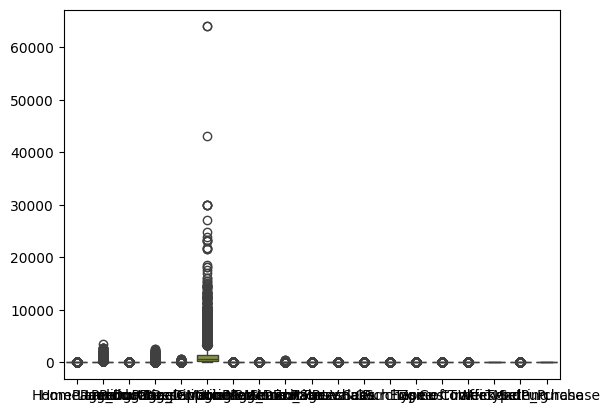

In [26]:
sns.boxplot(data)

In [27]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
print("The IQR of each column is \n",IQR)

The IQR of each column is 
 HomePage                              3.000000
HomePage_Duration                    91.000000
LandingPage                           0.000000
LandingPage_Duration                  0.000000
ProductDescriptionPage               31.000000
ProductDescriptionPage_Duration    1260.123333
GoogleMetric:Bounce Rates             0.018160
GoogleMetric:Exit Rates               0.035500
GoogleMetric:Page Values              0.000000
SeasonalPurchase                      0.000000
Month_SeasonalPurchase                2.000000
OS                                    1.000000
SearchEngine                          0.000000
Zone                                  3.000000
Type of Traffic                       2.000000
CustomerType                          0.000000
Cookies Setting                       2.000000
WeekendPurchase                       0.000000
Made_Purchase                         1.000000
dtype: float64


In [28]:
data=data[~((data<(q1-1.5*IQR))|(data>(q3+1.5*IQR)))]

<Axes: >

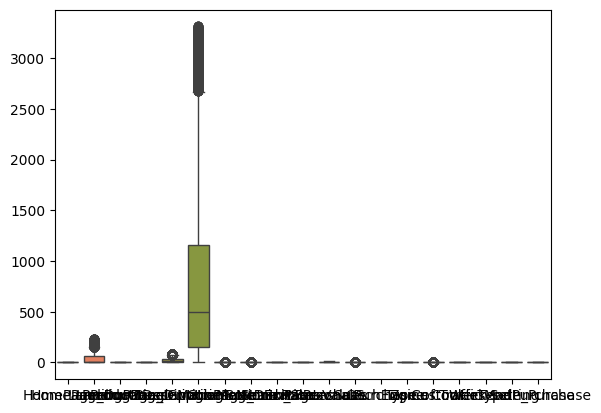

In [29]:
sns.boxplot(data)

In [30]:
data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,Month_SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Cookies Setting,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,NaN,0.0,0.0,2.0,4.0,NaN,NaN,3.0,2.0,1,0.0,0
1,0.0,0.0,0.0,0.0,2.0,2.666667,NaN,NaN,0.0,0.0,2.0,3.0,2.0,2.0,4.0,2.0,1,0.0,0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2.0,3.0,NaN,1.0,4.0,2.0,0,NaN,0
3,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,NaN,0.0,NaN,2.0,2.0,NaN,3.0,3.0,2.0,0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,0.0,0.0,2.0,1.0,2.0,1.0,5.0,2.0,1,NaN,0


In [31]:
from sklearn.preprocessing import StandardScaler
dataC=data.drop(['Month_SeasonalPurchase','OS','SearchEngine','Zone','Type of Traffic','CustomerType','Cookies Setting','WeekendPurchase','Made_Purchase'],axis=1)
std_scaler=StandardScaler()
num_std=std_scaler.fit_transform(dataC)
num_std_df = pd.DataFrame(num_std, columns=dataC.columns)
num_std_df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase
0,-0.743293,-0.65676,0.0,0.0,-1.057834,-0.977667,NaN,NaN,0.0,0.0
1,-0.743293,-0.65676,0.0,0.0,-1.006035,-0.974263,NaN,NaN,0.0,0.0
2,-0.743293,-0.65676,0.0,0.0,-0.591641,-0.176602,1.282726,0.847346,0.0,0.0
3,-0.743293,-0.65676,0.0,0.0,-1.057834,-0.977667,NaN,NaN,0.0,NaN
4,-0.247581,-0.65676,0.0,0.0,-1.109633,-0.977667,NaN,NaN,0.0,0.0


In [32]:
dataE=data[['Month_SeasonalPurchase','OS','SearchEngine','Zone','Type of Traffic','CustomerType','Cookies Setting','WeekendPurchase','Made_Purchase']]
data_new=pd.concat([num_std_df,dataE],axis=1)
data_new.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,Month_SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Cookies Setting,WeekendPurchase,Made_Purchase
0,-0.743293,-0.65676,0.0,0.0,-1.057834,-0.977667,NaN,NaN,0.0,0.0,2.0,4.0,NaN,NaN,3.0,2.0,1,0.0,0
1,-0.743293,-0.65676,0.0,0.0,-1.006035,-0.974263,NaN,NaN,0.0,0.0,2.0,3.0,2.0,2.0,4.0,2.0,1,0.0,0
2,-0.743293,-0.65676,0.0,0.0,-0.591641,-0.176602,1.282726,0.847346,0.0,0.0,2.0,3.0,NaN,1.0,4.0,2.0,0,NaN,0
3,-0.743293,-0.65676,0.0,0.0,-1.057834,-0.977667,NaN,NaN,0.0,NaN,2.0,2.0,NaN,3.0,3.0,2.0,0,0.0,0
4,-0.247581,-0.65676,0.0,0.0,-1.109633,-0.977667,NaN,NaN,0.0,0.0,2.0,1.0,2.0,1.0,5.0,2.0,1,NaN,0


In [33]:
data_new.isna().sum()

HomePage                           1202
HomePage_Duration                  1402
LandingPage                        3088
LandingPage_Duration               2815
ProductDescriptionPage             1182
ProductDescriptionPage_Duration    1168
GoogleMetric:Bounce Rates          1850
GoogleMetric:Exit Rates            1427
GoogleMetric:Page Values           2836
SeasonalPurchase                   1564
Month_SeasonalPurchase             2523
OS                                  134
SearchEngine                       5265
Zone                                606
Type of Traffic                    2542
CustomerType                       2181
Cookies Setting                       0
WeekendPurchase                    3455
Made_Purchase                         0
dtype: int64

In [34]:
data_new = data_new.fillna(method='ffill')
data_new=data_new.dropna()
data.shape

(14731, 19)

In [35]:
data.shape

(14731, 19)

In [36]:
data_new

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,Month_SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Cookies Setting,WeekendPurchase,Made_Purchase
2,-0.743293,-0.656760,0.0,0.0,-0.591641,-0.176602,1.282726,0.847346,0.0,0.0,2.0,3.0,2.0,1.0,4.0,2.0,0,0.0,0
3,-0.743293,-0.656760,0.0,0.0,-1.057834,-0.977667,1.282726,0.847346,0.0,0.0,2.0,2.0,2.0,3.0,3.0,2.0,0,0.0,0
4,-0.247581,-0.656760,0.0,0.0,-1.109633,-0.977667,1.282726,0.847346,0.0,0.0,2.0,1.0,2.0,1.0,5.0,2.0,1,0.0,0
5,-0.743293,-0.656760,0.0,0.0,-0.954235,-0.035538,-0.670506,-0.351109,0.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0,2,0.0,0
6,-0.743293,-0.656760,0.0,0.0,-0.954235,-0.473411,-0.670506,1.566418,0.0,0.0,2.0,1.0,2.0,3.0,3.0,2.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,-0.247581,-0.585548,0.0,0.0,0.910537,0.277405,0.831980,-0.550572,0.0,0.0,7.0,3.0,2.0,6.0,3.0,2.0,1,0.0,1
14727,-0.247581,1.426602,0.0,0.0,-0.539841,-0.654825,-0.670506,-0.831900,0.0,0.0,6.0,2.0,2.0,2.0,4.0,2.0,0,0.0,1
14728,0.248131,0.689139,0.0,0.0,-0.591641,0.482335,-0.670506,-0.303171,0.0,0.0,6.0,2.0,2.0,4.0,2.0,2.0,2,0.0,1
14729,-0.743293,-0.656760,0.0,0.0,-0.798838,0.371696,-0.670506,0.128273,0.0,0.0,5.0,2.0,2.0,4.0,1.0,2.0,2,0.0,1


In [37]:
y=data_new['Made_Purchase']
x=data_new.drop('Made_Purchase',axis=1)


<ipython-input-38-0f415a98584e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='Made_Purchase', ylabel='Density'>

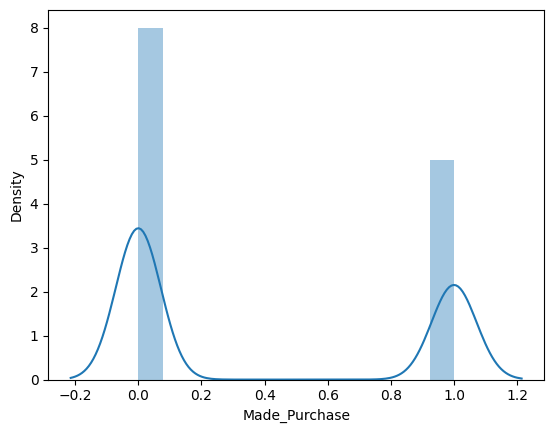

In [38]:
sns.distplot(y)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

In [ ]:
fold=KFold(n_splits=5,shuffle=True,random_state=1)
rfe=RFE(estimator=RandomForestClassifier(),n_features_to_select=None)
params={'n_features_to_select':list(range(1,20))}
model_cv=GridSearchCV(estimator=rfe,param_grid=params,scoring='accuracy',verbose=1,cv=fold,return_train_score=True)
model_cv.fit(x_train,y_train)
best_params = model_cv.best_params_
print(best_params)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

{'n_features_to_select': 10}


In [41]:
feature_ranking = model_cv.best_estimator_.ranking_
selected_feature_indices = feature_ranking == 1
print("Selected feature indices:",selected_feature_indices )

NameError: name 'model_cv' is not defined

In [42]:
x.head

<bound method NDFrame.head of        HomePage  HomePage_Duration  LandingPage  LandingPage_Duration  \
2     -0.743293          -0.656760          0.0                   0.0   
3     -0.743293          -0.656760          0.0                   0.0   
4     -0.247581          -0.656760          0.0                   0.0   
5     -0.743293          -0.656760          0.0                   0.0   
6     -0.743293          -0.656760          0.0                   0.0   
...         ...                ...          ...                   ...   
14726 -0.247581          -0.585548          0.0                   0.0   
14727 -0.247581           1.426602          0.0                   0.0   
14728  0.248131           0.689139          0.0                   0.0   
14729 -0.743293          -0.656760          0.0                   0.0   
14730 -0.743293          -0.656760          0.0                   0.0   

       ProductDescriptionPage  ProductDescriptionPage_Duration  \
2                   -0.5916

In [ ]:
Y=data_new['Made_Purchase']
X=data_new.drop(['Made_Purchase','LandingPage','LandingPage_Duration','SeasonalPurchase','OS','SearchEngine','CustomerType','Cookies Setting','WeekendPurchase'],axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
random_forest=RandomForestClassifier(n_estimators=100,random_state=0)
random_forest.fit(X_train,Y_train)
y_predictions=random_forest.predict(X_train)
random_forest.score(X_train,Y_train)
acc_random_forest=round(random_forest.score(X_train,Y_train)*100,2)
print(acc_random_forest)
con=confusion_matrix(Y_train,y_predictions)
print(con)
print(classification_report(Y_train,y_predictions,digits=3))

91.78
[[6846  357]
 [ 611 3969]]
              precision    recall  f1-score   support

           0      0.918     0.950     0.934      7203
           1      0.917     0.867     0.891      4580

    accuracy                          0.918     11783
   macro avg      0.918     0.909     0.913     11783
weighted avg      0.918     0.918     0.917     11783



In [ ]:
y_predictions=random_forest.predict(X_test)
random_forest.score(X_test,Y_test)
acc_random_forest_test=round(random_forest.score(X_test,Y_test)*100,2)
print(acc_random_forest_test)
con=confusion_matrix(Y_test,y_predictions)
print(con)
print(classification_report(Y_test,y_predictions,digits=3))

51.26
[[1301  559]
 [ 877  209]]
              precision    recall  f1-score   support

           0      0.597     0.699     0.644      1860
           1      0.272     0.192     0.225      1086

    accuracy                          0.513      2946
   macro avg      0.435     0.446     0.435      2946
weighted avg      0.477     0.513     0.490      2946



In [ ]:
gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
y_predictions=gaussian.predict(X_train)
gaussian.score(X_train,Y_train)
acc_gaussian=round(gaussian.score(X_train,Y_train)*100,2)
print(acc_gaussian)
con=confusion_matrix(Y_train,y_predictions)
print(con)
print(classification_report(Y_train,y_predictions,digits=3))

59.09
[[6051 1152]
 [3668  912]]
              precision    recall  f1-score   support

           0      0.623     0.840     0.715      7203
           1      0.442     0.199     0.275      4580

    accuracy                          0.591     11783
   macro avg      0.532     0.520     0.495     11783
weighted avg      0.552     0.591     0.544     11783



In [ ]:
gaussian=GaussianNB()
gaussian.fit(X_test,Y_test)
y_predictions=gaussian.predict(X_test)
gaussian.score(X_test,Y_test)
acc_gaussian_test=round(gaussian.score(X_test,Y_test)*100,2)
print(acc_gaussian_test)
con=confusion_matrix(Y_test,y_predictions)
print(con)
print(classification_report(Y_test,y_predictions,digits=3))

61.24
[[1578  282]
 [ 860  226]]
              precision    recall  f1-score   support

           0      0.647     0.848     0.734      1860
           1      0.445     0.208     0.284      1086

    accuracy                          0.612      2946
   macro avg      0.546     0.528     0.509      2946
weighted avg      0.573     0.612     0.568      2946



In [ ]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
y_predictions=logreg.predict(X_train)
logreg.score(X_train,Y_train)
acc_logreg=round(logreg.score(X_train,Y_train)*100,2)
print(acc_logreg)
con=confusion_matrix(Y_train,y_predictions)
print(con)
print(classification_report(Y_train,y_predictions,digits=3))

61.15
[[7198    5]
 [4573    7]]
              precision    recall  f1-score   support

           0      0.612     0.999     0.759      7203
           1      0.583     0.002     0.003      4580

    accuracy                          0.611     11783
   macro avg      0.597     0.500     0.381     11783
weighted avg      0.601     0.611     0.465     11783



In [ ]:
logreg=LogisticRegression()
logreg.fit(X_test,Y_test)
y_predictions=logreg.predict(X_test)
logreg.score(X_test,Y_test)
acc_logreg_test=round(logreg.score(X_test,Y_test)*100,2)
print(acc_logreg_test)
con=confusion_matrix(Y_test,y_predictions)
print(con)
print(classification_report(Y_test,y_predictions,digits=3))

63.14
[[1849   11]
 [1075   11]]
              precision    recall  f1-score   support

           0      0.632     0.994     0.773      1860
           1      0.500     0.010     0.020      1086

    accuracy                          0.631      2946
   macro avg      0.566     0.502     0.396      2946
weighted avg      0.584     0.631     0.495      2946



In [ ]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(X_train,Y_train)
y_predictions=decisiontree.predict(X_train)
decisiontree.score(X_train,Y_train)
acc_decisiontree=round(decisiontree.score(X_train,Y_train)*100,2)
print(acc_decisiontree)
con=confusion_matrix(Y_train,y_predictions)
print(con)
print(classification_report(Y_train,y_predictions,digits=3))

91.78
[[7176   27]
 [ 941 3639]]
              precision    recall  f1-score   support

           0      0.884     0.996     0.937      7203
           1      0.993     0.795     0.883      4580

    accuracy                          0.918     11783
   macro avg      0.938     0.895     0.910     11783
weighted avg      0.926     0.918     0.916     11783



In [ ]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(X_test,Y_test)
y_predictions=decisiontree.predict(X_test)
decisiontree.score(X_test,Y_test)
acc_decisiontree_test=round(decisiontree.score(X_test,Y_test)*100,2)
print(acc_decisiontree_test)
con=confusion_matrix(Y_test,y_predictions)
print(con)
print(classification_report(Y_test,y_predictions,digits=3))

97.42
[[1860    0]
 [  76 1010]]
              precision    recall  f1-score   support

           0      0.961     1.000     0.980      1860
           1      1.000     0.930     0.964      1086

    accuracy                          0.974      2946
   macro avg      0.980     0.965     0.972      2946
weighted avg      0.975     0.974     0.974      2946



In [ ]:
svc=LinearSVC()
svc.fit(X_train,Y_train)
y_predictions=svc.predict(X_train)
svc.score(X_train,Y_train)
acc_svc=round(svc.score(X_train,Y_train)*100,2)
print(acc_svc)
con=confusion_matrix(Y_train,y_predictions)
print(con)
print(classification_report(Y_train,y_predictions,digits=3))

61.14
[[7200    3]
 [4576    4]]
              precision    recall  f1-score   support

           0      0.611     1.000     0.759      7203
           1      0.571     0.001     0.002      4580

    accuracy                          0.611     11783
   macro avg      0.591     0.500     0.380     11783
weighted avg      0.596     0.611     0.464     11783



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
svc=LinearSVC()
svc.fit(X_test,Y_test)
y_predictions=svc.predict(X_test)
svc.score(X_test,Y_test)
acc_svc_test=round(svc.score(X_test,Y_test)*100,2)
print(acc_svc_test)
con=confusion_matrix(Y_test,y_predictions)
print(con)
print(classification_report(Y_test,y_predictions,digits=3))

63.17
[[1856    4]
 [1081    5]]
              precision    recall  f1-score   support

           0      0.632     0.998     0.774      1860
           1      0.556     0.005     0.009      1086

    accuracy                          0.632      2946
   macro avg      0.594     0.501     0.391      2946
weighted avg      0.604     0.632     0.492      2946



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
results=pd.DataFrame({'Model':['Random Forest','Gaussian','Logistic Regression','Decision Tree','LinearSVC'],'Training Score':[acc_random_forest,acc_gaussian,acc_logreg,acc_decisiontree,acc_svc]})
result_df=results.sort_values(by='Training Score',ascending=False)
result_df=result_df.set_index('Model')
result_df

,Training Score
Model,
Random Forest,91.78
Decision Tree,91.78
LinearSVC,63.17
Gaussian,61.15
Logistic Regression,61.15


In [ ]:
results=pd.DataFrame({'Model':['Random Forest','Gaussian','Logistic Regression','Decision Tree','LinearSVC'],'Testing Score':[acc_random_forest_test,acc_gaussian_test,acc_logreg_test,acc_decisiontree_test,acc_svc_test]})
result_df=results.sort_values(by='Testing Score',ascending=False)
result_df=result_df.set_index('Model')
result_df

,Testing Score
Model,
Decision Tree,97.42
LinearSVC,63.20
Logistic Regression,63.14
Gaussian,61.24
Random Forest,51.26
